In [1]:
#Tabular Playground Series - Jun 2021
#Link Below
#https://www.kaggle.com/competitions/tabular-playground-series-jun-2021

#Lundquist Griffin griffin.lundquist@studio.unibo.it,
#McCallan Oliver, oliver.mccallan@studio.unibo.it
#Mendoza Alberto, alberto.mendozaperea@studio.unibo.it
#Simon Christopher, ronald.simon@studio.unibo.it
#Lanccetti Valerico, valerico.laccetti@studio.unibo.it




import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
random_state = 42
np.random.seed(random_state) # this sets the random sequence. Setting only this the repeatability is guaranteed
                             # only if we re-execute the entire notebook

In [3]:
# import the dataset 
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.shape)
print(df_test.shape)

(200000, 77)
(100000, 76)


In [4]:
# show 10 random records
df_train.sample(n=10)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
119737,119737,0,0,15,0,0,0,0,0,11,...,0,0,1,0,0,0,1,0,0,Class_3
72272,72272,0,0,1,0,0,1,0,0,0,...,0,0,0,0,3,0,0,0,0,Class_6
158154,158154,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_6
65426,65426,6,0,0,0,0,2,0,0,0,...,3,7,2,1,0,0,0,1,1,Class_8
30074,30074,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,Class_1
23677,23677,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
134858,134858,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,Class_9
176418,176418,0,0,0,0,0,14,0,0,0,...,0,0,1,1,1,2,0,0,0,Class_2
132467,132467,0,2,1,3,1,0,0,7,8,...,0,1,0,0,20,18,1,0,1,Class_8
4082,4082,40,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,Class_5


In [5]:
df_test.sample(n=10)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
19445,219445,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
38435,238435,0,0,0,0,0,2,0,0,0,...,25,0,8,0,0,0,0,4,0,0
29251,229251,4,1,0,1,1,1,0,0,0,...,2,0,0,0,0,27,0,5,0,3
5311,205311,0,0,0,0,1,0,3,1,3,...,4,0,0,0,0,0,0,0,6,0
2014,202014,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
80367,280367,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,1,0,0,0
58013,258013,0,0,0,1,0,0,0,0,9,...,4,0,0,0,0,0,0,0,0,0
69440,269440,0,0,0,0,0,34,0,0,24,...,0,0,0,0,1,0,0,0,0,0
1758,201758,0,6,0,19,0,13,2,0,14,...,1,0,3,0,49,2,0,0,2,0
37699,237699,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,0,0,0,0


In [6]:
df_train.drop(columns=['id'], inplace = True)
df_test.drop(columns=['id'], inplace = True)

df_train.dropna(axis=0)
df_test.dropna(axis=0)

print(df_train.shape, df_test.shape)

(200000, 76) (100000, 75)


In [7]:
# split df_train
Xfull, y = df_train.drop(columns=['target']), df_train['target']

print(Xfull.shape)
print(y.shape)

(200000, 75)
(200000,)


In [67]:
# number of unique values
Xfull.nunique().sort_values()[:30:-1]

feature_15    105
feature_60     99
feature_59     92
feature_73     91
feature_46     87
feature_28     78
feature_32     77
feature_54     72
feature_61     70
feature_63     70
feature_19     66
feature_55     65
feature_47     63
feature_62     61
feature_3      59
feature_29     58
feature_67     57
feature_41     56
feature_5      55
feature_22     55
feature_43     53
feature_69     52
feature_9      51
feature_74     50
feature_24     50
feature_51     49
feature_27     49
feature_70     49
feature_2      48
feature_39     47
feature_42     42
feature_0      42
feature_68     42
feature_33     41
feature_65     41
feature_25     40
feature_6      40
feature_13     40
feature_50     40
feature_48     39
feature_38     39
feature_35     39
feature_72     37
feature_11     37
dtype: int64

In [68]:
# show y range
y.unique()

array(['Class_6', 'Class_2', 'Class_8', 'Class_3', 'Class_1', 'Class_5',
       'Class_7', 'Class_9', 'Class_4'], dtype=object)

In [69]:
le = LabelEncoder()
y = le.fit_transform(y)
y.unique()

array([5, 5, 1, ..., 7, 6, 7])

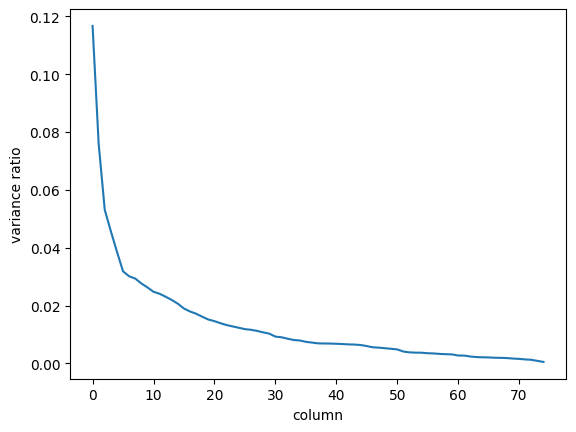

In [70]:
# create X
pca = PCA()
Xtrans = pca.fit_transform(Xfull)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('column idx')
plt.ylabel('variance ratio')
plt.show()

In [71]:
# select X
ratios = sorted(pca.explained_variance_ratio_, reverse = True)
idx = np.argmax(np.cumsum(ratios) >= 0.9)
X = Xtrans[:,:idx]

print(X.shape)

(200000, 43)


In [72]:
model_lbls = ['dt' # decision tree
             #,'nb' # gaussian naive bayes
             ,'rf'   # random forest
             #,'lp'   # linear perceptron
             #,'svc'  # support vector
             #,'knn'  # k nearest neighbours
             #,'adb'  # adaboost
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-12,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state),
           'param': [{'kernel': ['rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],
                    },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[20,30,40,50]
                     ,'learning_rate':[0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{
                      # 'max_depth': [*range(4,30)]
                      'max_depth': [*range(4,30,4)]
                    #  ,'n_estimators':[*range(20,80,5)]
                     ,'n_estimators':[*range(10,30,5)]
                     ,'class_weight': [None,'balanced']
                      }]
          }

}


In [73]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state, train_size = .01)
print(Xtrain.shape[0])
print(Xtest.shape[0])

150000
50000


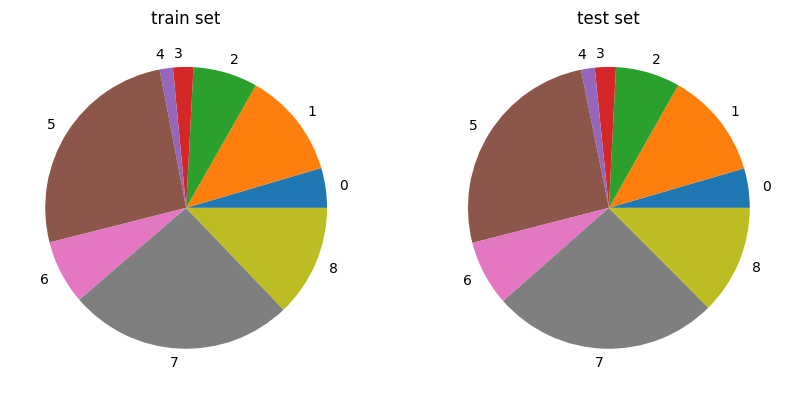

In [94]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.pie(x = np.unique(ytrain, return_counts=True)[1], labels=np.unique(ytrain, return_counts=True)[0])
plt.title('train set')
plt.subplot(1, 2, 2)
plt.pie(x = np.unique(ytest, return_counts=True)[1], labels=np.unique(ytest, return_counts=True)[0])
plt.title('test set')
plt.show()

In [95]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# select features 
k_best = idx  # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k_best)
Xtrain = selector.fit_transform(Xtrain, ytrain)
Xtest = selector.transform(Xtest)

In [97]:
print(Xtrain.shape)
print(Xtest.shape)

(150000, 43)
(50000, 43)


In [96]:
scorings = ['accuracy'
            # ,'precision_macro'
            # ,'recall_macro'
            ,'f1_macro'
            ]

In [76]:
from sklearn.model_selection import ParameterGrid

NameError: name 'scorings' is not defined

In [78]:
# final test with best model trained on all (train) data